<div class="alert alert-warning">
<h1><span style="color: #926EAE;">Мой комментарий</span></h1>
<p><strong><span style="color: #926EAE;">Данный проект выполнен не до конца!!! Я бы хотел поинтересоваться нормально ли я движусь перед тем как выполнять задания по исследованию. Правильно ли я отбросил редкие значения? Правильно ли я заполнил пропущенные данные(там где их заполнил)? Если нет то как их надо. Так же вопрос по тем пропускам, надо ли их заполнить? (если да то как). Правильно ли я строю гистограммы? (простите что я их предобработке данных графиками называл, потом исправлю). Ну и дайте, пожалуйста, советы по будущим заданиям(а то данный проект по сравнению с прошлым через чур объемный :D). Старался максимально все пояснять. Заранее спасибо!!!(то что сделал снизу крестики проставил)</span></strong></p>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

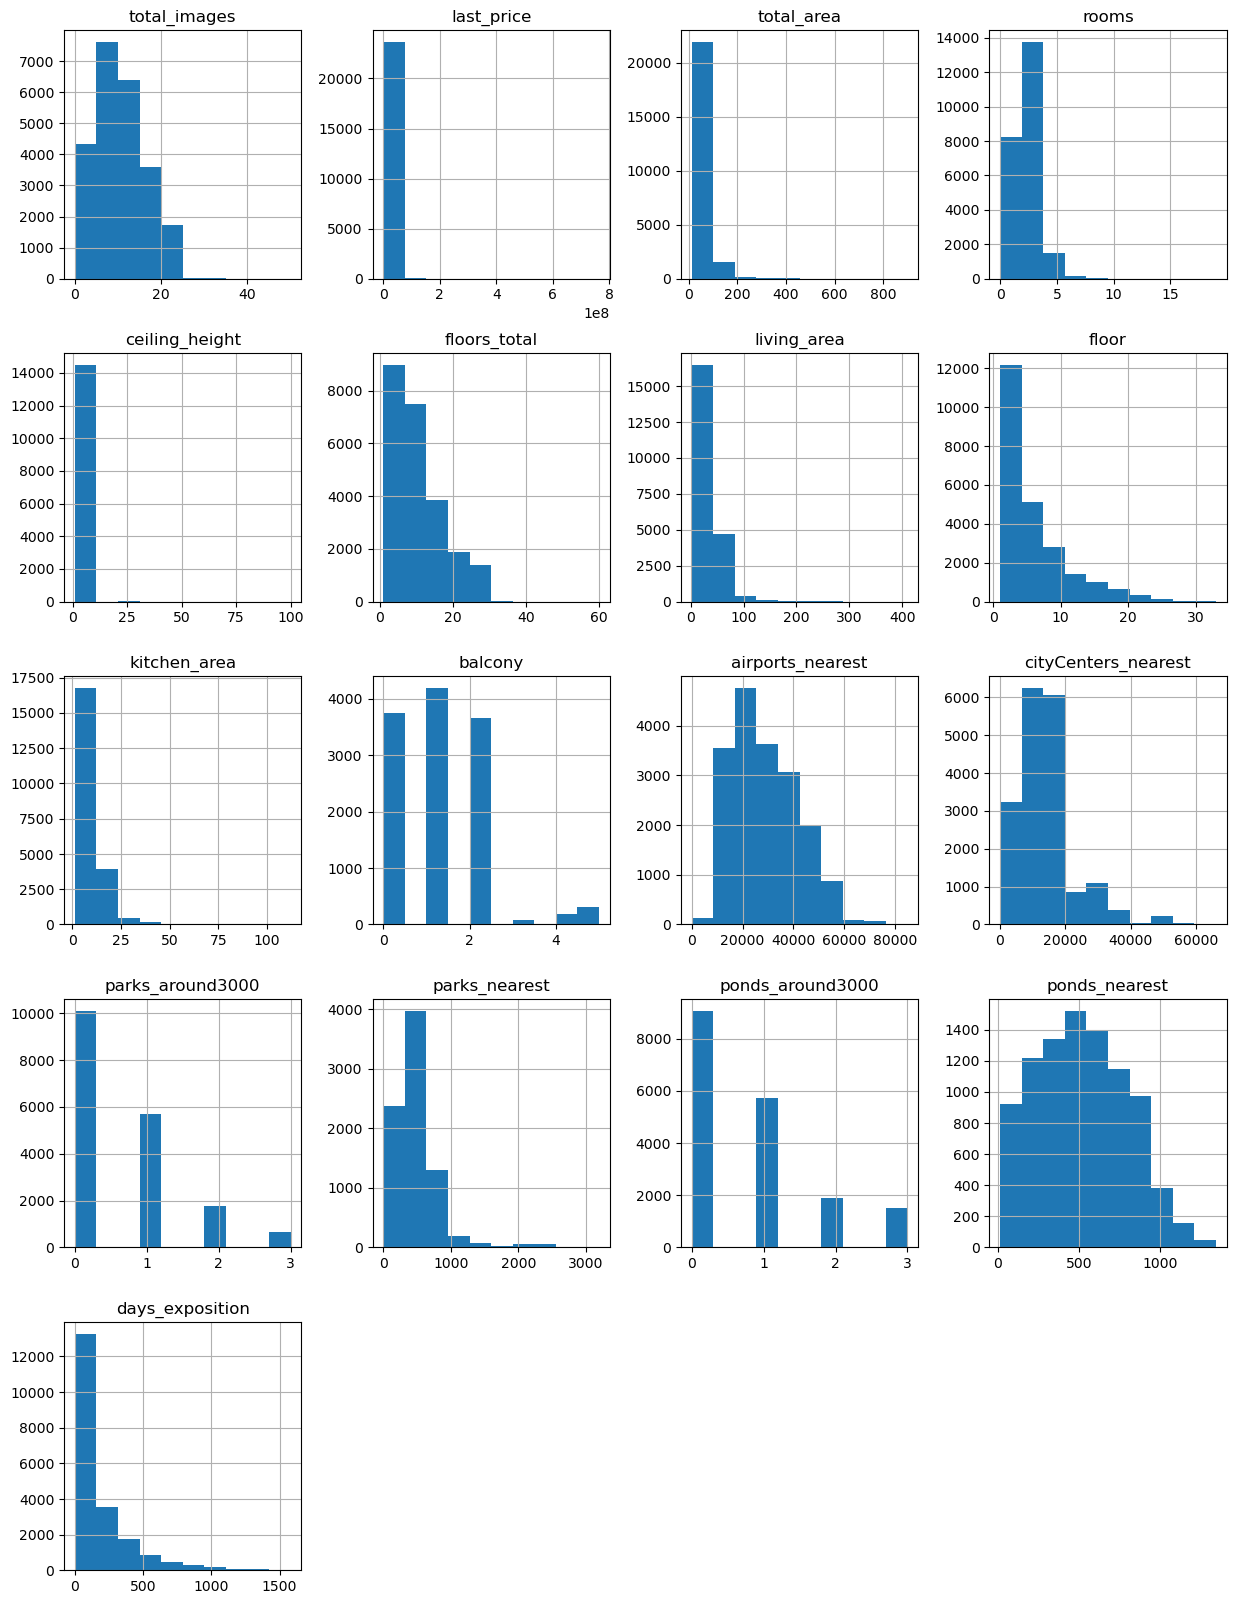

In [4]:
df.hist(figsize=(15, 20))

### Предобработка данных

In [5]:
df.isna().sum() # пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

удалим строки где имеются пропуски данных в locality_name и floors_total:

In [6]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Можем сделать вывод к пропускам в balcony, parks_around3000, ponds_around3000, что их просто не заполнили так как их просто нет, так что заполним пропуски нулями:

In [7]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Данные столбцы нам не понадобятся в выполении этого проекта, так что можем от них избавится:

In [8]:
df.drop(['is_apartment', 'total_images', 'studio', 'open_plan'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           21700 non-null  float64
 7   floor                 23565 non-null  int64  
 8   kitchen_area          21343 non-null  float64
 9   balcony               23565 non-null  float64
 10  locality_name         23565 non-null  object 
 11  airports_nearest      18041 non-null  float64
 12  cityCenters_nearest   18064 non-null  float64
 13  parks_around3000      23565 non-null  float64
 14  parks_nearest         8030 non-null   float64
 15  ponds_around3000   

Сменим тип данных для удобства:

In [10]:
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  int32  
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  int32  
 6   living_area           21700 non-null  float64
 7   floor                 23565 non-null  int64  
 8   kitchen_area          21343 non-null  float64
 9   balcony               23565 non-null  int32  
 10  locality_name         23565 non-null  object 
 11  airports_nearest      18041 non-null  float64
 12  cityCenters_nearest   18064 non-null  float64
 13  parks_around3000      23565 non-null  float64
 14  parks_nearest         8030 non-null   float64
 15  ponds_around3000   

Посмотрим уникальные значения locality_name и их количество:

In [11]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
df['locality_name'].unique().shape[0] # количество уникальных значений

364

Сначала приведем всё к нижнему регистру. Потом заменим все "ё" на "е" и взглянем на количество уникальных значений:

In [13]:
df['locality_name'] = df['locality_name'].str.lower() # нижний регистр
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # замена
df['locality_name'].unique().shape[0] # количество уникальных значений

330

Теперь заменим "городской поселок" на "поселок городского типа" и взглянем на количество уникальных значений:

In [14]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа') # замена
df['locality_name'].unique().shape[0] # количество уникальных значений

323

Взглянем на наличие явных дубликатов:

In [15]:
df.duplicated().sum()

0

Оценим наши данные:

In [16]:
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Рассмотрим last_price(цена на момент снятия с публикации):

In [17]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Цена квартиры'}, ylabel='Frequency'>

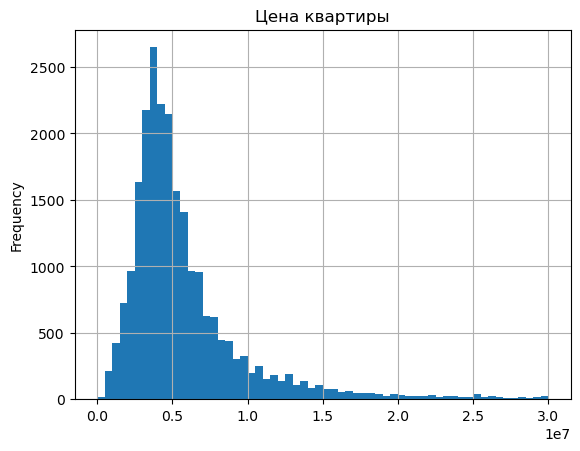

In [18]:
df['last_price'].plot(kind='hist', title='Цена квартиры', bins=60, range=(0, 3e+7), grid=True)

На графике 0 до 30 млн мы можем наблюдать, что есть значения приблеженные к 0, а для квартир это слишком дешево. Плюс в describe мы видим минимальное и максимальное. Так что посмотрим на количество квартир меньше 1 млн и больше 90 млн:

Квартиры со стоимостью меньше 1 млн:

In [19]:
df.query('last_price < 1e+6')['last_price'].count()

225

225 квартир стоят меньше 1 млн, судя по всему данная информация не является аномалией, так что оставим.
Рассмотрим количество квартир, которые стоят меньше 50 000, потому что на графике прям очень рядом с 0 есть небольшой скачок и в describe мы точно знаем, что есть очень дешевая квартира (что не норма):

In [20]:
df.query('last_price < 5e+4')['last_price'].count()

1

Вот и она принципе та самая дешевая квартира, избавимся от неё удалив ее из df:

In [21]:
df.drop(index=df.query('last_price < 5e+4').index, inplace=True)

Для удобства в дальнейшем избавимся от слишком дорогих квартир:

In [22]:
df.query('last_price > 9e+7')['last_price'].count()

45

Их как раз не особо много, так что удаляем для удобства из df:

In [23]:
df.drop(index=df.query('last_price > 9e+7').index, inplace=True)

Рассмотрим total_area(общая площадь квартиры в квадратных метрах (м²)):


In [24]:
df['total_area'].describe()

count    23519.000000
mean        59.806163
std         33.003552
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        590.000000
Name: total_area, dtype: float64

из describe мы знаем что у нас есть минимальная площадь 12 и максимальная 900 квадратных метров. Насчет минимальной квартиры принципе притензий нету (так что оставим ее). А вот максимальная это черезчур и я не думаю, что их так много. Так что возьмем 900 поделим на 3 и получим 300 квадратных. 
И взглянем на график от 12 до 300:

<AxesSubplot:title={'center':'Площадь квартиры'}, ylabel='Frequency'>

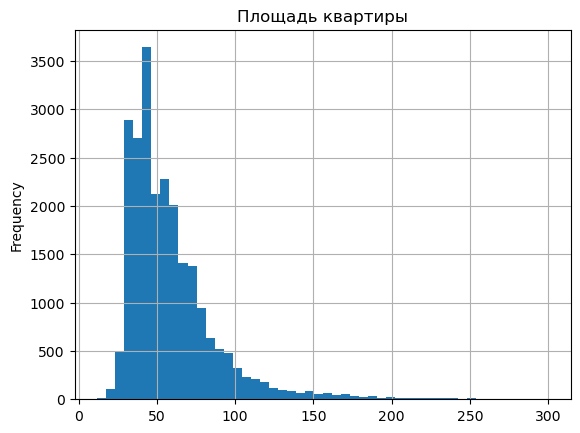

In [25]:
df['total_area'].plot(kind='hist', title='Площадь квартиры', bins=50, range=(12, 300), grid=True)

Принципе по графику уже ясно, что квартир больш 300 квадратных метров будет немного. Так что убедимся при помощи count и избавимся от них для удобства:

In [26]:
df.query('total_area > 300')['total_area'].count()

41

Принципе мы этого и ожидали благодаря графику, удалим их:

In [27]:
df.drop(index=df.query('total_area > 300').index, inplace=True)

Рассмотрим rooms(число комнат):

In [28]:
df['rooms'].describe()

count    23478.000000
mean         2.056691
std          1.042676
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

За счет describe мы знаем, что максимальное количество комнат в квартире это 19. Давайте для начала посмотрим на график в целом:

<AxesSubplot:title={'center':'Число комнат'}, ylabel='Frequency'>

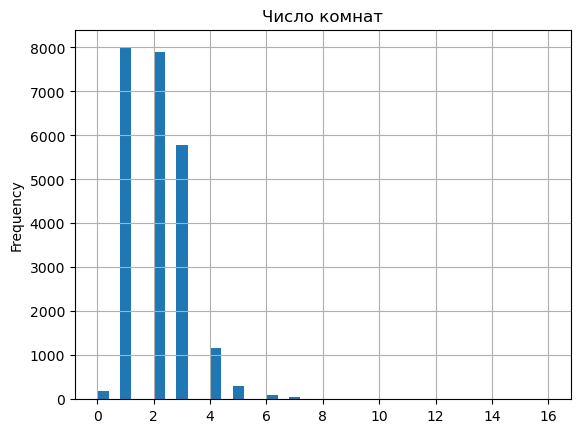

In [29]:
df['rooms'].plot(kind='hist', title='Число комнат', bins=40, grid=True)

По графику мы принципе видим что квартиры из нашего df в основном имеют количество комнат от 0 до 7. Так давайте удалим для удобства где их больше.

In [30]:
df.query('rooms > 7')['rooms'].count()

18

In [31]:
df.drop(index=df.query('rooms > 7').index, inplace=True)

Рассмотрим ceiling_height — высота потолков (м):

In [32]:
df['ceiling_height'].describe()

count    14409.000000
mean         2.767719
std          1.263293
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.

Максимальная высота потолков, как правило, не регламентируется, но чаще всего она в современной застройке не превышает 3,2 метра. В старых домах с увеличенными габаритами и площадью потолки могут быть 4 метра высотой и более.

Так же можем заметить что у нас отпечатка в данных, где потолки стремятся к небесам, исправим ее поделив на 10.

По скольку в наших человеческих реалиях возможен потолок от 2,5 м до 4х метров, будем оталкиваться от этого. Но чтобы было проще работать с опечаткой будем учитывать от 2,5 до 3,2 метров (с опечаткой будем выглядеть от 25 до 32 метров). Для удобства оставил комментарии:

In [33]:
df.drop(index=df.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True) # удаляем от 4 до 25
df.drop(index=df.query('ceiling_height > 32').index,inplace=True) # удаляем больше 32
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32)]['ceiling_height']/10) # от 25 до 32 мы приводим значения к человеческим
df.drop(index=df.query('ceiling_height < 2.5').index,inplace=True) # удаляем значения ниже нормы


Посмотрим, на итоговый график:

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

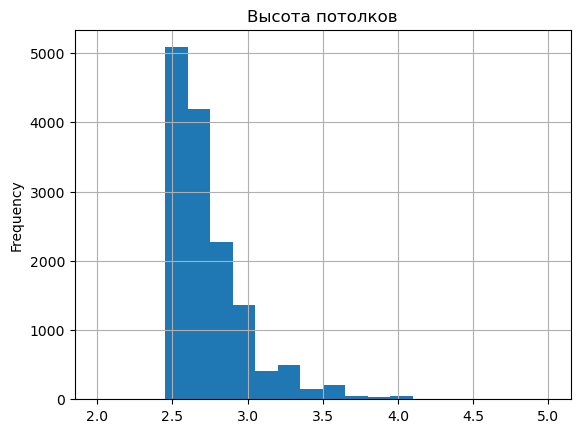

In [34]:
df['ceiling_height'].plot(kind='hist', title='Высота потолков', bins=20, range=(2, 5), grid=True)

Все хорошо

Рассмотрим floors_total(всего этажей в доме):

In [35]:
df['floors_total'].describe()

count    23339.000000
mean        10.712970
std          6.600892
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Из describe мы знаем что количество в доме у нас может быть от 1 до 60. Давайте взглянем на график:

<AxesSubplot:title={'center':'Количество этажей дома'}, ylabel='Frequency'>

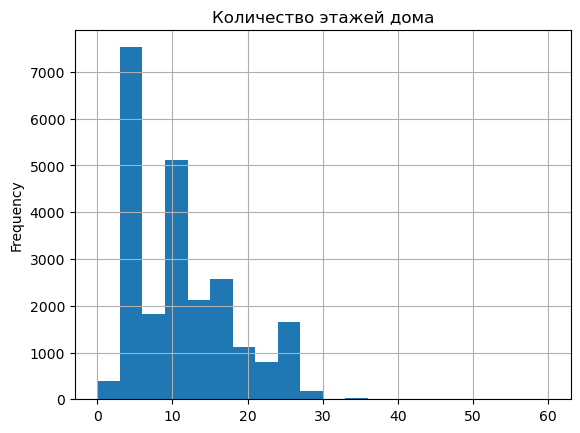

In [36]:
df['floors_total'].plot(kind='hist', title='Количество этажей дома', bins=20, range=(0, 60), grid=True)

По графику мы принципе сразу понимаем, что домов с количеством этажей больше 30 очень мало. Так что убедимся в их малом количестве и удалим их из нашего df:

In [37]:
df.query('floors_total > 30')['floors_total'].count()

31

Как и ожидалось, удаляем:

In [38]:
df.drop(index=df.query('floors_total > 30').index,inplace=True)

Рассмотрим living_area (жилая площадь в квадратных метрах (м²)):

In [39]:
df['living_area'].describe()

count    21471.000000
mean        33.797797
std         19.164688
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        250.000000
Name: living_area, dtype: float64

Из describe мы знаем что минимальное у нас 2 квадратных метра (что явно является не нормой), а максимальное 400+. Давай взглянем на график:

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

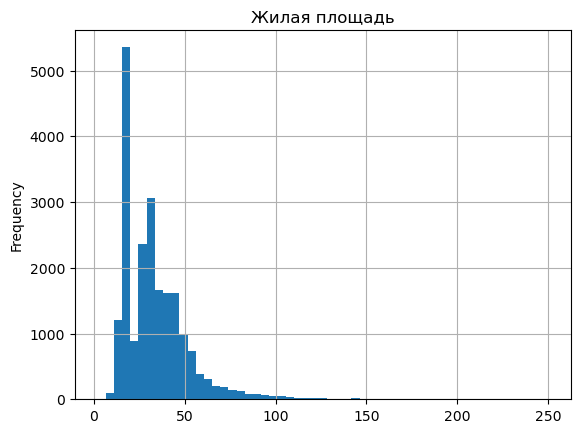

In [40]:
df['living_area'].plot(kind='hist', title='Жилая площадь', bins=55, grid=True)

По графику мы принципе сразу можем понять, что квартиры с жилой площадью больше 150ти мы учитывать не будем. Так как их слишком мало. Но надо так же избавиться от квартир где жилая площадь мала:

In [41]:
df.query('living_area > 150')['living_area'].count() # количество больше 150 метров квадратных

54

Как и ожидалось, удалим их:

In [42]:
df.drop(index=df.query('living_area > 150').index,inplace=True)

Посмотрим на квартиры с малой площадью и избавимся от них:

In [43]:
df.query('living_area < 10')['living_area'].count() # количество меньше 10 метров квадратных

25

In [44]:
df.drop(index=df.query('living_area < 10').index,inplace=True) # удаляем

Рассмотрим floor(этаж):

In [45]:
df['floor'].describe()

count    23229.000000
mean         5.873262
std          4.850543
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Так как мы уже работали с этажами домомов и из describe знаем, что нету квартир расположенных на 0ом этаже. Просто взглянем на график:

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

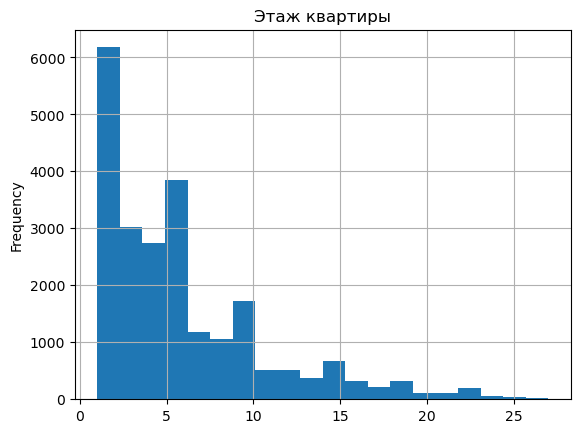

In [46]:
df['floor'].plot(kind='hist', title='Этаж квартиры', bins=20, grid=True)

По графику видно, что все нормально

Рассмотрим kitchen_area(площадь кухни в квадратных метрах (м²)):

In [47]:
df['kitchen_area'].describe()

count    21049.000000
mean        10.413359
std          5.479108
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Из describe мы знаем что есть квартира с минимальной кухней +-1 квадратного метра (это слишком мало) и максимальной 112 метров квадратных (не думаю что таких значений много). Поэтому взглянем на график:

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

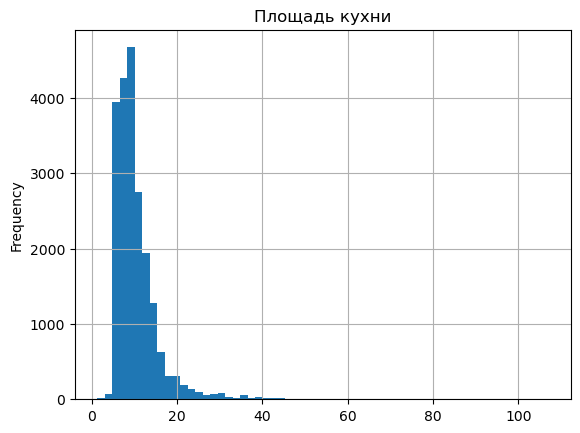

In [48]:
df['kitchen_area'].plot(kind='hist', title='Площадь кухни', bins=60, grid=True)

На графике мы сразу видим, что кухон с площадью больше 50ти квадратных метров мало. Так что избавимся от них и так же от слишком маленьких:

In [49]:
df.query('kitchen_area > 50')['living_area'].count() # количество кухон где площадь больше 50ти

30

In [50]:
df.query('kitchen_area < 2')['living_area'].count() # количество мелких кухон

1

Удалим их:

In [51]:
df.drop(index=df.query('kitchen_area < 2').index,inplace=True)
df.drop(index=df.query('kitchen_area > 50').index,inplace=True)

Рассмотрим balcony(число балконов):

In [52]:
df['balcony'].describe()

count    23197.000000
mean         0.594215
std          0.959953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

По describe мы видим, что все вроде нормально. Убедимся при помощи графика:

<AxesSubplot:title={'center':'Число балконов'}, ylabel='Frequency'>

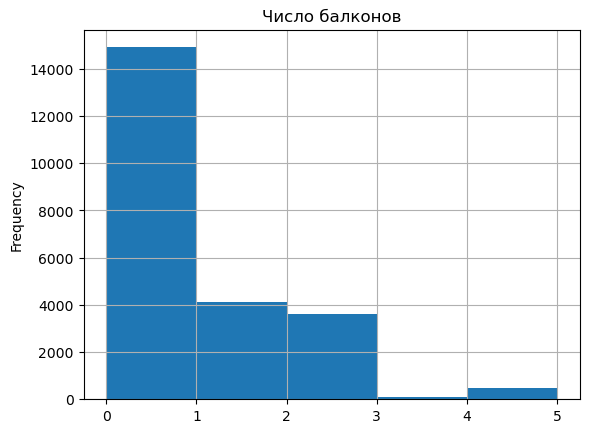

In [53]:
df['balcony'].plot(kind='hist', title='Число балконов', bins=5, grid=True)

Все хорошо

Рассмотрим days_exposition(сколько дней было размещено объявление (от публикации до снятия)):

In [54]:
df['days_exposition'].describe()

count    20099.000000
mean       179.864769
std        219.038018
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

По describe мы поняли, что минимального значения 0 нету и это хорошо, поэтому построим график, чтобы избавиться от редких:

<AxesSubplot:title={'center':'Сколько дней прошло'}, ylabel='Frequency'>

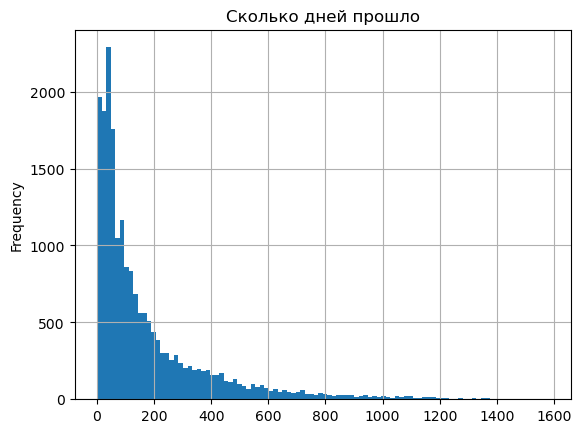

In [55]:
df['days_exposition'].plot(kind='hist', title='Сколько дней прошло', bins=100, grid=True)

Видим что публикаций мало после 1400 дней, взглянем на них и удалим:

In [56]:
df.query('days_exposition > 1400')['days_exposition'].count() # Считаем

19

In [57]:
df.drop(index=df.query('days_exposition > 1400').index,inplace=True) # Удаляем

Рассмотрим airports_nearest(расстояние до ближайшего аэропорта в метрах (м)):

In [58]:
df['airports_nearest'].describe()

count    17699.000000
mean     28850.752585
std      12686.267626
min          0.000000
25%      18490.000000
50%      26890.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

По describe мы сразу видим минимальное значение 0. А это означает что квартира находится прямо в аэропорту. Так что построим график, чтобы это отследить и избавиться от данной проблемы:

<AxesSubplot:title={'center':'Расстояние до аэропорта'}, ylabel='Frequency'>

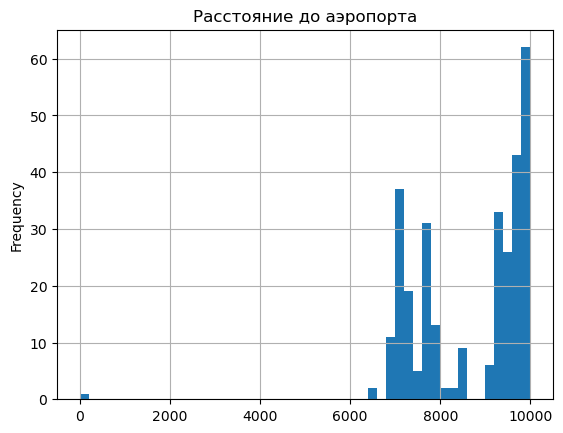

In [59]:
df['airports_nearest'].plot(kind='hist', title='Расстояние до аэропорта', bins=50, range=(0, 1e+4), grid=True)

In [60]:
df.query('airports_nearest < 2000')['airports_nearest'].count()

1

Она как раз единственная такая, так что удалим:

In [61]:
df.drop(index=df.query('airports_nearest < 2000').index,inplace=True)

Оценим данные еще разок:

In [62]:
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2.317700e+04,23177.000000,23177.000000,14182.000000,23177.000000,21342.000000,23177.000000,20998.000000,23177.000000,17698.000000,17718.000000,23177.000000,7815.000000,23177.000000,8802.000000,20079.000000
mean,6.014365e+06,58.502535,2.040471,2.717116,10.692238,33.429905,5.875696,10.331453,0.594167,28852.382755,14275.879219,0.460715,491.259117,0.579324,521.763349,178.640221
std,5.485516e+06,27.850051,1.002629,0.250090,6.538117,17.835163,4.853412,5.051761,0.959949,12684.772115,8593.344514,0.739921,342.407571,0.873675,277.288613,215.454313
min,4.300000e+05,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18490.000000,9425.250000,0.000000,288.000000,0.000000,299.000000,45.000000
50%,4.600000e+06,51.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13149.000000,0.000000,455.000000,0.000000,506.000000,95.000000
75%,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,11.900000,1.000000,37407.000000,16293.000000,1.000000,613.000000,1.000000,733.000000,229.000000
max,9.000000e+07,300.000000,7.000000,4.000000,29.000000,150.000000,27.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1396.000000


Теперь наш df стал лучше

Заполним пропуски там где сможем:

Заполним пропуски в days_exposition медианами:

In [63]:
df['days_exposition'] = df['days_exposition'].fillna(-1).astype(int) # пока пропуски заполним (-1) для удобства и сменим тип
locality_name_median = df.groupby('locality_name').median()['days_exposition'].to_dict() # медианы
df.query('days_exposition == -1')['days_exposition'].count() # считаем пропуски

3098

Напишем функцию где будем проверять наличие наших пропусков и заполнять их медианой из переменной locality_name_median:

In [64]:
def days_exposition_fill(row):
    '''
    В данной функции мы заполняем пропуски медианой
    '''
    days_exposition = row['days_exposition']
    locality_name = row['locality_name']
    if days_exposition == -1: # Проверяем на пропуск      
        return locality_name_median[locality_name] # используем нашу заготовленную переменную с медианами
    return days_exposition


df['days_exposition'] = df.apply(days_exposition_fill, axis=1) # вызываем нашу функцию
df.query('days_exposition == -1')['days_exposition'].count() # считаем пропуски

82

У нас получилось избавиться почти от всех пропусков так, что добьем медианой по всему столбцу:

In [65]:
df.loc[df['days_exposition'] == -1] = df['days_exposition'].median()
df.query('days_exposition == -1')['days_exposition'].count() # считаем пропуски

0

Аналогично поступим и с living_area:

In [66]:
df['total_area'] = df['total_area'].round().astype(int) # поменяем тип и округлим для удобства
df['living_area'] = df['living_area'].fillna(-1) # так же меняем пропуски на (-1) для удобства устранения проблемы
total_area_median = df.groupby('total_area').median()['living_area'].to_dict() # медианы
df.query('living_area == -1')['living_area'].count() # считаем пропуски

1831

In [67]:
def living_area_count(row):
    '''
    В данной функции мы заполняем пропуски медианой
    '''
    living_area = row['living_area']
    total_area = row['total_area']
    if living_area == -1: # осуществляем проверку на пропуск   
        return total_area_median[total_area] # используем заготовленную переменную с медианами
    return living_area


df['living_area'] = df.apply(living_area_count, axis=1) # вызываем нашу функцию
df.query('living_area == -1')['living_area'].count() # считаем пропуски

10

Пропусков осталось слишком мало, так что давайте просто избавимся от этих значений:

In [68]:
df = df.loc[df['living_area'] != -1]
df.query('living_area == -1')['living_area'].count() # считаем пропуски

0

Чтобы не получить искажение данных при заполение пропусков в ceiling_height, найдем нужный столбец при помощи corr:

In [69]:
df['ceiling_height'].corr(df['rooms'])

0.9862359199899433

Коэффициент корреляции нам показывает, что данный стоблец(rooms) подходит для наших манипуляций

In [70]:
pd.options.mode.chained_assignment = None # уберем предупреждение
df['ceiling_height'] = df['ceiling_height'].fillna(-1) # так же для удобства заменим наши пропуски на (-1)
rooms_median = df.groupby('rooms').median()['ceiling_height'].to_dict() # медианы
df.query('ceiling_height == -1')['ceiling_height'].count() # считаем пропуски

8951

In [71]:
def ceiling_height_count(row):
    '''
    В данной функции мы заполняем пропуски медианой
    '''
    ceiling_height = row['ceiling_height']
    rooms = row['rooms']
    if ceiling_height == -1: # осуществляем проверку на пропуск      
        return rooms_median[rooms] # используем заготовленную переменную с медианами
    return ceiling_height


df['ceiling_height'] = df.apply(ceiling_height_count, axis=1) # вызываем нашу функцию
df.query('ceiling_height == -1')['ceiling_height'].count() # считаем пропуски

110

Мы избавились от большинства пропусков. Так что добьем их медианой по столбцу

In [72]:
df.loc[df['ceiling_height'] == -1] = df['ceiling_height'].median()
df.query('ceiling_height == -1')['ceiling_height'].count() # считаем пропуски

0

Для того чтобы заполнить пропуски в kitchen_area. Будем использовать total_area => посмотрим соотношение кухни с общей площадью и данный результат занесем в новый столбец (от корого в дальнейшем избавимся), бладгодаря новому столбцу мы найдем срд.арфм. и им заполним наши пропуски:

In [73]:
df['kitchen'] = df['kitchen_area'] / df['total_area'] # соотношение площади кухни с общей площадью квартиры
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df['kitchen'].mean()).round(1) # заполняем срд.арфм. и округляем
df.drop(['kitchen'], axis='columns', inplace=True) # избавляемся данного столбца, так как он нам больше не понадобится

Посмотрим что у нас в итоге получилось:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23167 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23167 non-null  float64
 1   total_area            23167 non-null  float64
 2   first_day_exposition  23167 non-null  object 
 3   rooms                 23167 non-null  float64
 4   ceiling_height        23167 non-null  float64
 5   floors_total          23167 non-null  float64
 6   living_area           23167 non-null  float64
 7   floor                 23167 non-null  float64
 8   kitchen_area          23167 non-null  float64
 9   balcony               23167 non-null  float64
 10  locality_name         23167 non-null  object 
 11  airports_nearest      17822 non-null  float64
 12  cityCenters_nearest   17842 non-null  float64
 13  parks_around3000      23167 non-null  float64
 14  parks_nearest         7991 non-null   float64
 15  ponds_around3000   

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу: цену одного квадратного метра

In [75]:
df['price_1m'] = (df['last_price'] / df['total_area']).round().astype(int) # для удобства округлим и поменяем тип

Добавим в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [76]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # приведем к нужному типу

In [77]:
df['day_week'] = df['first_day_exposition'].dt.weekday

Добавим в таблицу: месяц публикации объявления

In [78]:
df['month'] = df['first_day_exposition'].dt.month

Добавим в таблицу: год публикации объявления

In [79]:
df['year'] = df['first_day_exposition'].dt.year

Добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [80]:
def floor_type_find(row):
    '''
    В данной функции мы осуществляем проверку типа этажа
    '''
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'


df['floor_type'] = df.apply(floor_type_find, axis=1)

Добавим в таблицу: расстояние в км до центра города

In [81]:
df['distance_city_center'] = round(df['cityCenters_nearest'] / 1000).astype('Int32') # для удобства округлим и поменяем тип

Посмотрим что в итоге у нас получилось:

In [82]:
df.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_week,month,year,floor_type,distance_city_center
0,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.00,8.0,25.0,0.0,...,482.0,2.0,755.0,73.0,120370,3,3,2019,другой,16
1,3350000.0,40.0,2018-12-04,1.0,2.50,11.0,18.60,1.0,11.0,2.0,...,NaN,0.0,NaN,81.0,83750,1,12,2018,первый,19
2,5196000.0,56.0,2015-08-20,2.0,2.50,5.0,34.30,4.0,8.3,0.0,...,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,14
3,64900000.0,159.0,2015-07-24,3.0,2.50,14.0,90.80,9.0,30.9,0.0,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7
4,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.00,13.0,41.0,0.0,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8
5,2890000.0,30.0,2018-09-10,1.0,2.50,12.0,14.40,5.0,9.1,0.0,...,NaN,0.0,NaN,55.0,96333,0,9,2018,другой,<NA>
6,3700000.0,37.0,2017-11-02,1.0,2.50,26.0,10.60,6.0,14.4,1.0,...,NaN,0.0,NaN,155.0,100000,3,11,2017,другой,19
7,7915000.0,72.0,2019-04-18,2.0,2.50,24.0,43.00,22.0,18.9,2.0,...,NaN,0.0,NaN,73.0,109931,3,4,2019,другой,12
8,2900000.0,33.0,2018-05-23,1.0,2.50,27.0,15.43,26.0,8.8,0.0,...,NaN,0.0,NaN,189.0,87879,2,5,2018,другой,<NA>
9,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.60,7.0,6.5,2.0,...,NaN,0.0,NaN,289.0,88525,6,2,2017,другой,15


### Проведите исследовательский анализ данных

Изучим и опишем следующие параметры:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления

Общая площадь:

In [83]:
df['total_area'].describe()

count    23167.000000
mean        58.455001
std         27.882032
min          2.500000
25%         40.000000
50%         52.000000
75%         69.000000
max        300.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

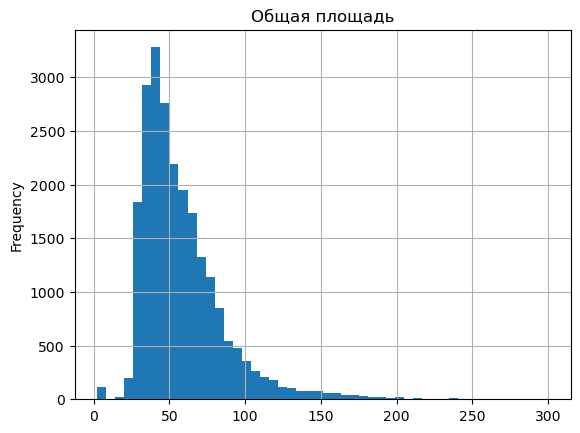

In [84]:
df['total_area'].plot(kind='hist', title='Общая площадь', bins=50, grid=True)

Когда мы занимались предобработкой данных, мы избавились от редких значений. Так что выглядит все нормально.

Жилая площадь:

In [85]:
df['living_area'].describe()

count    23167.000000
mean        33.572721
std         18.073886
min          2.500000
25%         18.600000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

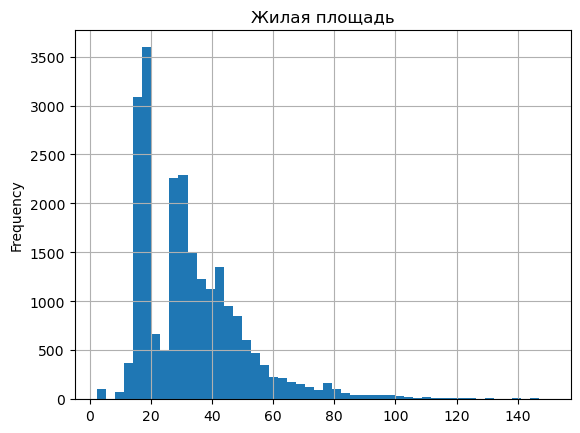

In [86]:
df['living_area'].plot(kind='hist', title='Жилая площадь', bins=50, grid=True)

Когда мы занимались предобработкой данных, мы избавились от редких значений, а так же заполнили пропуски медианами. Все выглядит хорошо.

Площадь кухни:

In [87]:
df['kitchen_area'].describe()

count    23167.000000
mean        10.578690
std          6.545119
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         79.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

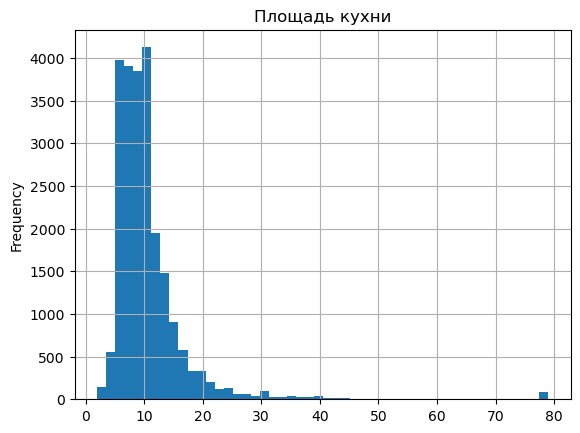

In [88]:
df['kitchen_area'].plot(kind='hist', title='Площадь кухни', bins=50, grid=True)

Когда мы занимались предобработкой данных мы удаляли редкие значения и запонили потом пропуски срд.арфм. соотношения кухни к общей площади. И видимо при данном раскладе у нас появились редкие значения. Избавимся от них:

In [89]:
df.query('kitchen_area > 50')['kitchen_area'].count()

82

In [90]:
df.drop(index=df.query('kitchen_area > 50').index, inplace=True)

Оценим снова:

In [91]:
df['kitchen_area'].describe()

count    23085.000000
mean        10.335651
std          5.128541
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

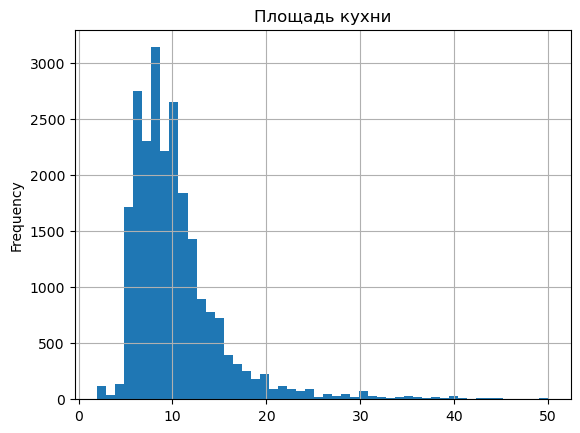

In [92]:
df['kitchen_area'].plot(kind='hist', title='Площадь кухни', bins=50, grid=True)

Все хорошо

Цена объекта:

In [93]:
df['last_price'].describe()

count    2.308500e+04
mean     6.006717e+06
std      5.477129e+06
min      2.500000e+00
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.000000e+07
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

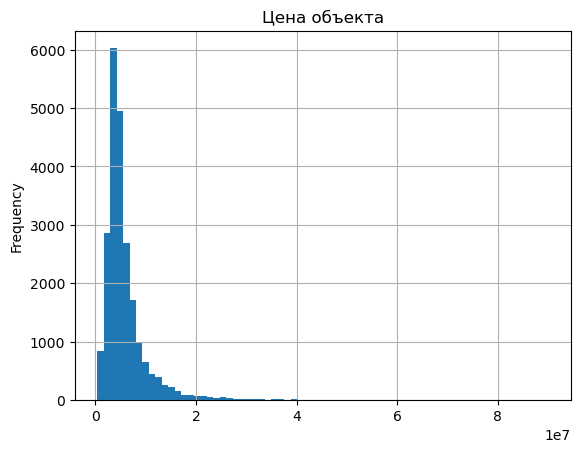

In [94]:
df['last_price'].plot(kind='hist', title='Цена объекта', bins=70, range=(4e+5, 9e+7), grid=True)

Когда мы занимались предобработкой данных мы удалили редкие значения. Все выглядит нормально.

Количество комнат:

In [95]:
df['rooms'].describe()

count    23085.000000
mean         2.052891
std          0.992977
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

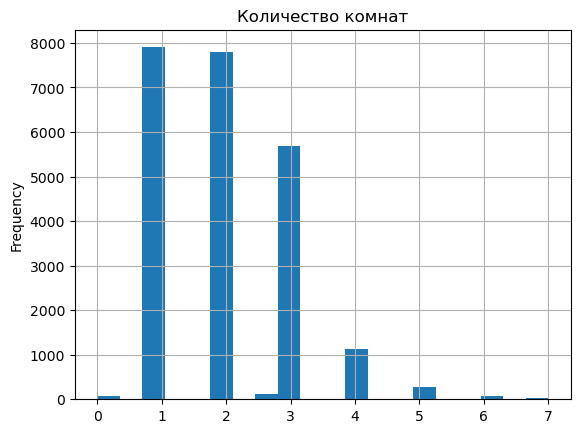

In [96]:
df['rooms'].plot(kind='hist', title='Количество комнат', bins=20, grid=True)

Когда мы занимались предобработкой данных мы удалили редкие значения. по describe и гистрограмме все выглядит нормально.

Высота потолков:

In [97]:
df['ceiling_height'].describe()

count    23085.000000
mean         2.636408
std          0.222406
min          2.500000
25%          2.500000
50%          2.500000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

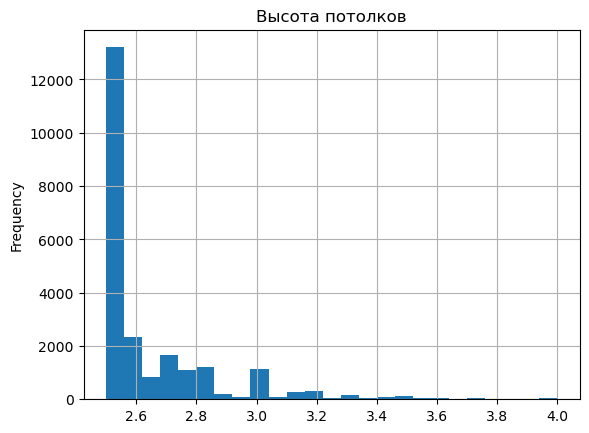

In [98]:
df['ceiling_height'].plot(kind='hist', title='Высота потолков', bins=25, grid=True)

Когда мы занимались предобработкой данных мы удалили редкие значения. И запонлили пропуски медианами. Так что все выглядит нормально.

Этаж квартиры:

In [99]:
df['floor'].describe()

count    23085.000000
mean         5.848690
std          4.830873
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<AxesSubplot:>

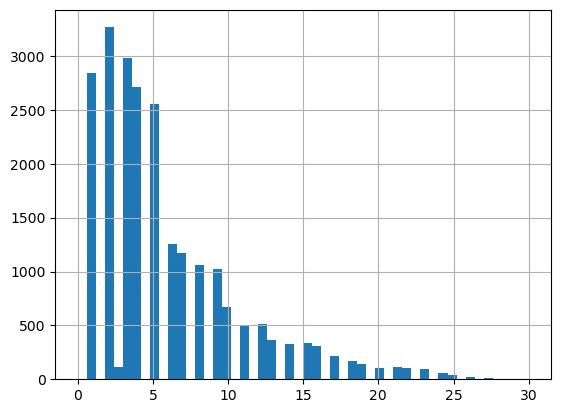

In [100]:
df['floor'].hist(bins=50, range=(0, 30))

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

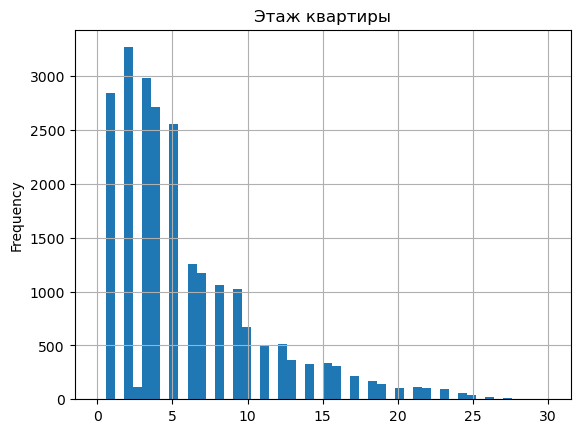

In [101]:
df['floor'].plot(kind='hist', title='Этаж квартиры', bins=50, range=(0, 30), grid=True)

Так же как и в предобработке данных все нормально.

тип этажа квартиры («первый», «последний», «другой»):

In [102]:
df['floor_type'].describe()

count      23085
unique         3
top       другой
freq       16923
Name: floor_type, dtype: object

<AxesSubplot:title={'center':'Тип этажа квартиры'}, xlabel='floor_type'>

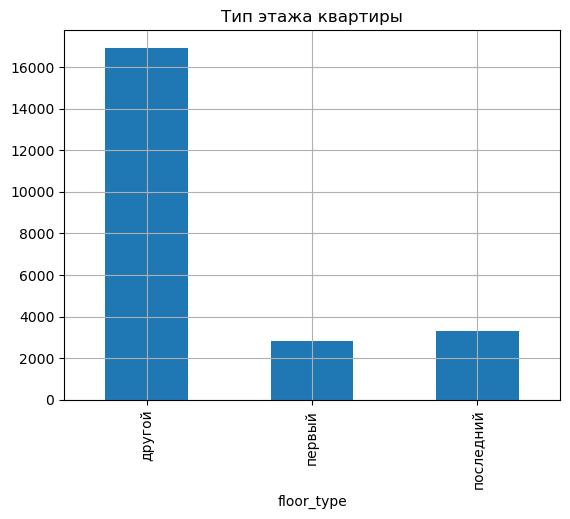

In [103]:
df.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', title='Тип этажа квартиры', grid=True)

Все выглядит нормально.

Общее количество этажей в доме:

In [104]:
df['floors_total'].describe()

count    23085.000000
mean        10.622439
std          6.522775
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Общее количество этажей в доме'}, ylabel='Frequency'>

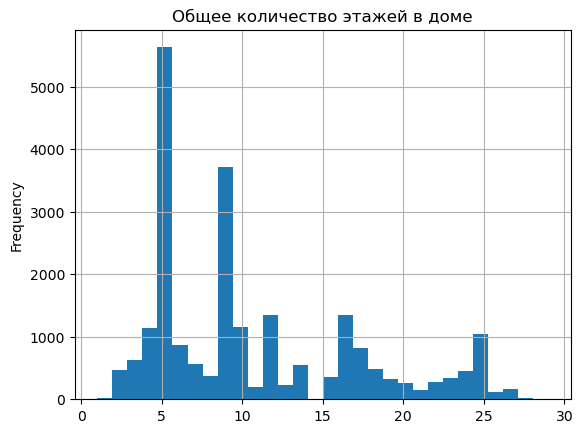

In [105]:
df['floors_total'].plot(kind='hist', title='Общее количество этажей в доме', bins=30, grid=True)

Когда мы занимались предобработкой данных мы удалили редкие значения. Все выглядит нормально.

Расстояние до центра города в метрах:

In [106]:
df['cityCenters_nearest'].describe()

count    17760.000000
mean     14190.693187
std       8650.166832
min          2.500000
25%       9289.000000
50%      13106.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [107]:
df['cityCenters_nearest'].isna().sum() # количество пропусков

5325

<AxesSubplot:title={'center':'Расстояние до центра города в метрах'}, ylabel='Frequency'>

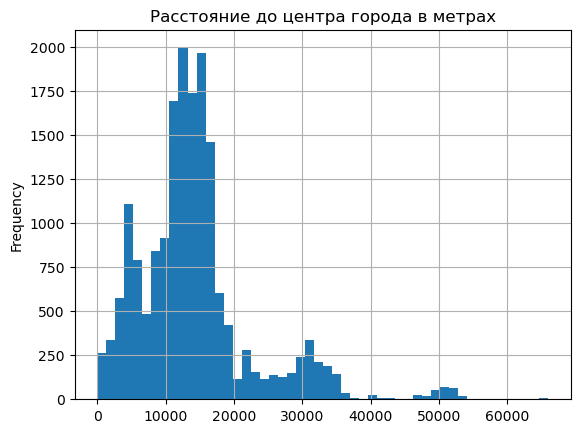

In [108]:
df['cityCenters_nearest'].plot(kind='hist', title='Расстояние до центра города в метрах', bins=50, grid=True)

В предобработке данных мы не избавились от пропусков в данной категории. Так что будем их учитывать.

Расстояние до ближайшего аэропорта:

In [109]:
df['airports_nearest'].describe()

count    17740.000000
mean     28690.159470
std      12841.984593
min          2.500000
25%      18410.000000
50%      26786.000000
75%      37328.250000
max      84869.000000
Name: airports_nearest, dtype: float64

In [110]:
df['airports_nearest'].isna().sum() # количество пропусков

5345

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

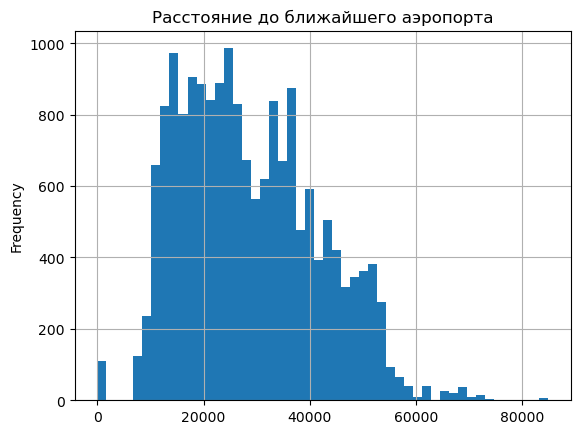

In [111]:
df['airports_nearest'].plot(kind='hist', title='Расстояние до ближайшего аэропорта', bins=50, grid=True)

В предобработке данных мы избавились от квартиры, которая имела расстояние до аэропрота 0. Но от пропусков не избавились, так что учитываем их.

Расстояние до ближайшего парка:

In [112]:
df['parks_nearest'].describe()

count    7909.000000
mean      484.154128
std       344.739304
min         1.000000
25%       281.000000
50%       448.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [113]:
df['parks_nearest'].isna().sum() # количество пропусков

15176

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

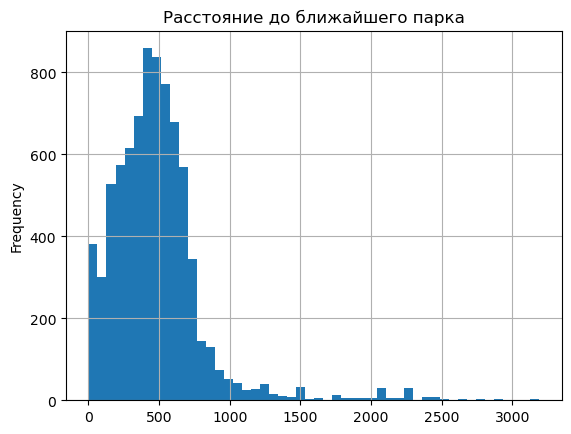

In [114]:
df['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка', bins=50, grid=True)

В предобработке данных мы не избавились от данных пропусков. Так что учитываем их.

день и месяц публикации объявления:

In [115]:
df['day_week'].describe()

count    23085.000000
mean         2.569201
std          1.784780
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_week, dtype: float64

In [116]:
df['month'].describe()

count    23085.000000
mean         6.373749
std          3.500819
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

<AxesSubplot:title={'center':'Дни недели'}, ylabel='Frequency'>

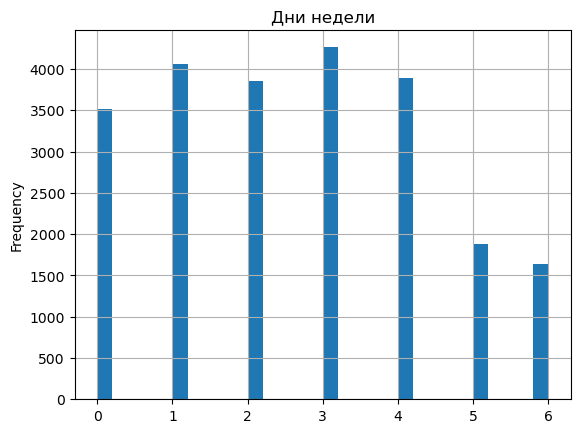

In [117]:
df['day_week'].plot(kind='hist', title='Дни недели', bins=30, grid=True)

<AxesSubplot:title={'center':'Месяцы'}, ylabel='Frequency'>

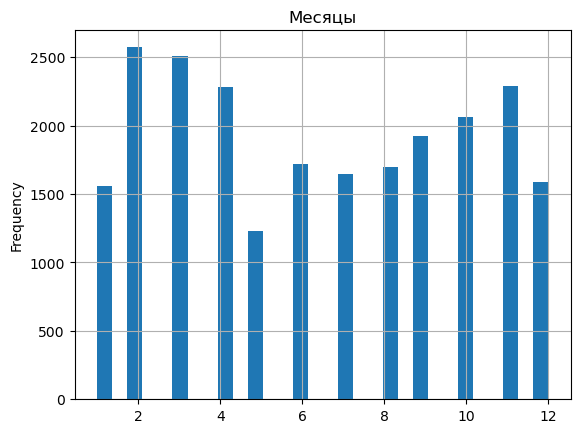

In [118]:
df['month'].plot(kind='hist', title='Месяцы', bins=30, grid=True)

С данными все нормально.

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление:
    - Построим гистограмму.
    - Посчитаем среднее и медиану.

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод